In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

In [2]:
def cost_function(theta, nX, y):
    m = np.shape(nX)[0]
    theta = theta.reshape(3,1)
    J = (sum(np.power((np.dot(nX, theta) - y.reshape((m,1))), 2)) / (2 * m))[0]
    g = (np.dot(nX.T, np.dot(nX, theta) - y.reshape((m,1))) / m).reshape(3)
    return J, g

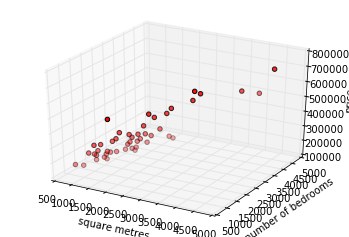

In [3]:
#read and plot data
data = np.loadtxt('ex1data2.txt')
X = data[:,0:2]
y = data[:,2]

m = np.shape(X)[0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0].T, X[:,0].T, y, c='r', marker='o')
ax.set_xlabel('square metres')
ax.set_ylabel('number of bedrooms')
ax.set_zlabel('price')

plt.show()

#feature normalization
mean = np.mean(X, axis=0)
s = np.std(X, axis=0)
nX = np.array([np.ones((m)), (X[:,0] - mean[0]) / s[0], (X[:,1] - mean[1]) / s[1]]).T

#starting theta values
initial_theta = np.zeros((np.shape(nX)[1]))

In [4]:
#feature normalization
mean = np.mean(X, axis=0)
s = np.std(X, axis=0)
nX = np.array([np.ones((m)), (X[:,0] - mean[0]) / s[0], (X[:,1] - mean[1]) / s[1]]).T

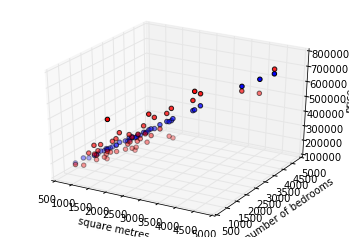

In [5]:
#compute theta and plot computed costs
res = minimize(cost_function, initial_theta, method='BFGS', jac=True, args=(nX, y))

ny = np.dot(nX, res.x.reshape(3,1))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0].T, X[:,0].T, y, c='r', marker='o')
ax.scatter(X[:,0].T, X[:,0].T, ny.T[0], c='b', marker='o')
ax.set_xlabel('square metres')
ax.set_ylabel('number of bedrooms')
ax.set_zlabel('price')

plt.show()